In [1]:
#kütüphaneler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [2]:
#veri yukleme
veri=pd.read_csv("banknote%50.csv")
veri=pd.DataFrame(veri)
veri.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
veri.shape

(686, 5)

In [4]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  686 non-null    float64
 1   skewness  686 non-null    float64
 2   curtosis  686 non-null    float64
 3   entropy   686 non-null    float64
 4   class     686 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 26.9 KB


In [5]:
veri.describe()

,variance,skewness,curtosis,entropy,class
count,686.000000,686.000000,686.000000,686.000000,686.000000
mean,0.313443,1.574493,1.456068,-1.171871,0.500000
std,2.788017,5.913048,4.456188,2.129992,0.500365
min,-6.752600,-13.773100,-5.261300,-7.785300,0.000000
25%,-1.770900,-2.329475,-1.670075,-2.432875,0.000000
50%,0.205965,1.975150,0.561365,-0.571130,0.500000
75%,2.535800,6.268350,3.680250,0.426167,1.000000
max,6.563300,12.951600,17.927400,2.154700,1.000000


In [6]:
data = veri.drop_duplicates(subset ="class",)
data

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
343,-1.3971,3.3191,-1.3927,-1.99480,1


In [7]:
veri.value_counts("class")

class
0    343
1    343
dtype: int64

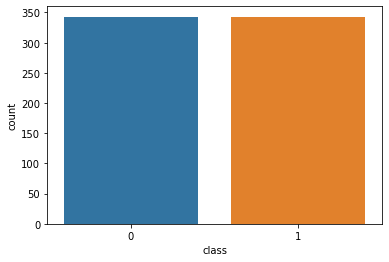

In [8]:
#Türler için bir sayım grafiği 
sns.countplot(x='class', data=veri, )
plt.show()

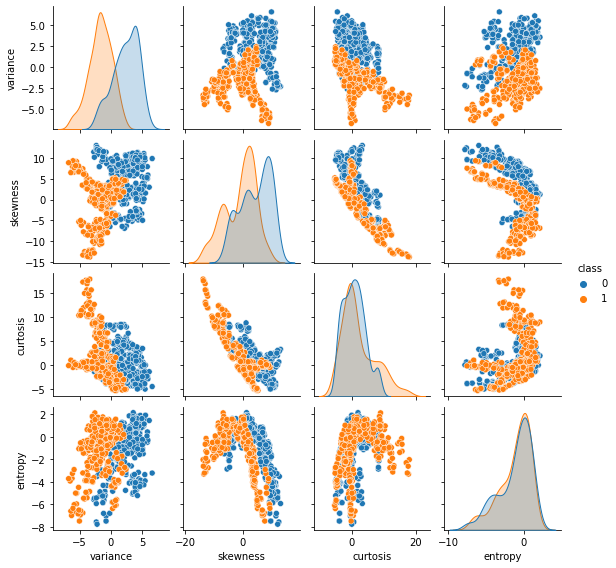

In [9]:
sns.pairplot(veri.drop([], axis = 1), 
             hue='class', height=2)

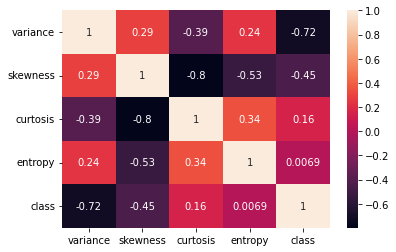

In [10]:
sns.heatmap(veri.corr(method='pearson').drop(
  [], axis=1).drop([], axis=0),
            annot = True);
  
plt.show()

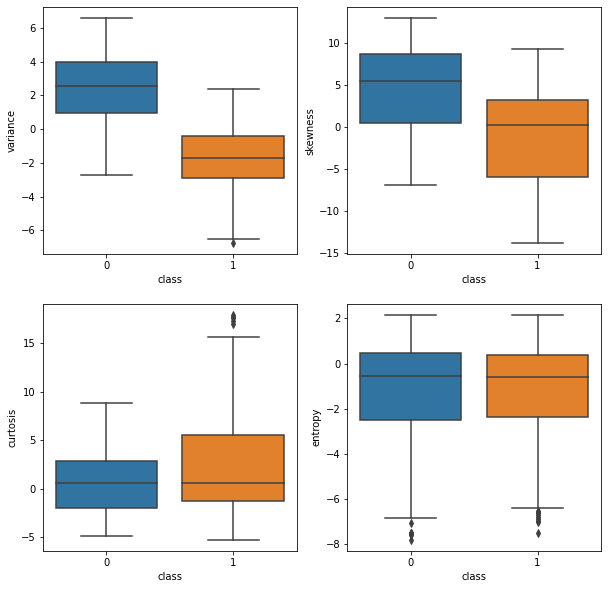

In [11]:
def graph(y):
    sns.boxplot(x="class", y=y, data=veri)
  
plt.figure(figsize=(10,10))
      
plt.subplot(221)
graph('variance')
  
plt.subplot(222)
graph('skewness')
  
plt.subplot(223)
graph('curtosis')
  
plt.subplot(224)
graph('entropy')
  
plt.show()

<AxesSubplot:xlabel='entropy'>

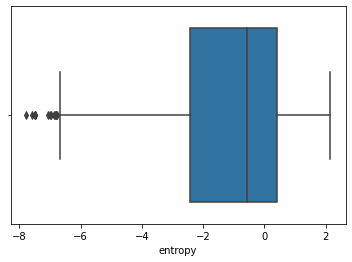

In [12]:
sns.boxplot(x='entropy', data=veri)

In [13]:
for column in veri.columns[1:-1]:
    for specy in veri["class"].unique():
        Specy_type = veri[veri["class"] == specy]
        Selected_column = Specy_type[column]
        q1 = Selected_column.quantile(0.25) # ilk çeyreği seçmek için
        q3 = Selected_column.quantile(0.75) # ikinci çeyreği seçmek için
        iqr = q3 - q1 # bu çeyrekler arası aralık
        upper_limit = q3 + 1.6 * iqr
        lower_limit = q1 - 1.6 * iqr        
        outlierss = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index # aykırı değerler endekslerini seçme
        print(outlierss)
        veri.drop(index = outlierss, inplace=True) # aykırı değerleri düşürmek
        

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([401, 462, 523, 584, 645], dtype='int64')
Int64Index([45, 47, 194, 202, 291], dtype='int64')
Int64Index([357, 372, 418, 433, 479, 540, 555, 601], dtype='int64')


<AxesSubplot:xlabel='entropy'>

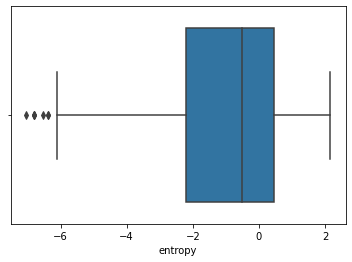

In [14]:
sns.boxplot(x='entropy', data=veri)

<AxesSubplot:xlabel='curtosis'>

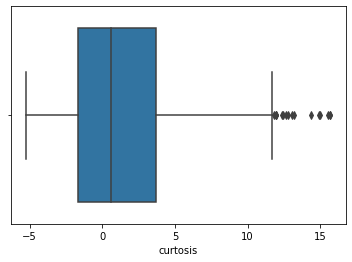

In [15]:
sns.boxplot(x='curtosis', data=veri)

In [16]:
for column in veri.columns[1:-1]:
    for specy in veri["class"].unique():
        Specy_type = veri[veri["class"] == specy]
        Selected_column = Specy_type[column]
        q1 = Selected_column.quantile(0.25) # ilk çeyreği seçmek için
        q3 = Selected_column.quantile(0.75) # ikinci çeyreği seçmek için
        iqr = q3 - q1 # bu çeyrekler arası aralık
        upper_limit = q3 + 1.6 * iqr
        lower_limit = q1 - 1.6 * iqr        
        outlierss = Selected_column[(Selected_column > upper_limit) | (Selected_column < lower_limit)].index # aykırı değerleri seçme
        print(outlierss)
        veri.drop(index = outlierss, inplace=True) # aykırı değerleri düşürmek

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([41, 59, 139, 341], dtype='int64')
Int64Index([439, 561, 562, 662], dtype='int64')


<AxesSubplot:xlabel='curtosis'>

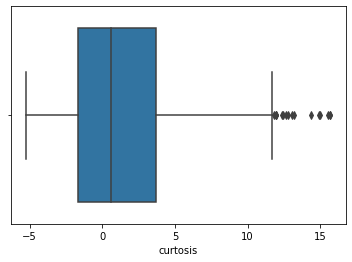

In [17]:
sns.boxplot(x='curtosis', data=veri)

<AxesSubplot:xlabel='variance'>

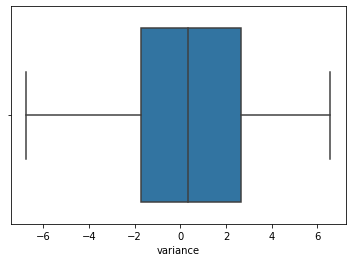

In [18]:
sns.boxplot(x='variance', data=veri)

<AxesSubplot:xlabel='skewness'>

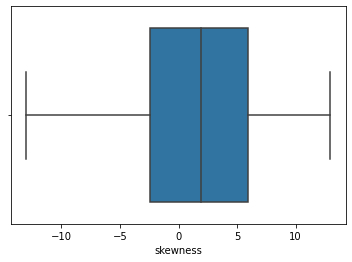

In [19]:
sns.boxplot(x='skewness', data=veri)

In [20]:
veri.shape

(660, 5)

In [21]:
#test
print(veri)

x = veri.iloc[:,1:4].values #bağımsız değişkenler
y = veri.iloc[:,4:].values #bağımlı değişken
print(y)

     variance  skewness  curtosis  entropy  class
0     3.62160   8.66610  -2.80730 -0.44699      0
1     4.54590   8.16740  -2.45860 -1.46210      0
2     3.86600  -2.63830   1.92420  0.10645      0
3     3.45660   9.52280  -4.01120 -3.59440      0
4     0.32924  -4.45520   4.57180 -0.98880      0
..        ...       ...       ...      ...    ...
681   1.43780   0.66837  -2.02670  1.02710      1
682   2.19430   4.55030  -4.97600 -2.72540      1
683   0.73760   4.85250  -4.79860 -5.66590      1
684  -5.63700   8.12610   0.13081 -5.01420      1
685  -3.01930   1.77750   0.73745 -0.45346      1

[660 rows x 5 columns]
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 

In [22]:
#verilerin egitim ve test icin bolunmesi
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [23]:
#verilerin olceklenmesi- standardard
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [24]:
#normalizasyon
from sklearn.preprocessing import StandardScaler

# scaler objesi oluşturma
std_scaler = StandardScaler()
std_scaler
#veriyi normalize hale getirmek için -1,1 aralığına sığdırır
df_std = pd.DataFrame(std_scaler.fit_transform(veri), columns=veri.columns)

df_std

,variance,skewness,curtosis,entropy,class
0,1.167636,1.253062,-0.989426,0.279764,-0.987951
1,1.507926,1.166191,-0.907867,-0.256306,-0.987951
2,1.257614,-0.716119,0.117244,0.572030,-0.987951
3,1.106889,1.402296,-1.271011,-1.382354,-0.987951
4,-0.044480,-1.032615,0.736502,-0.006361,-0.987951
...,...,...,...,...,...
655,0.363647,-0.140110,-0.806849,1.058217,1.012196
656,0.642161,0.536107,-1.496673,-0.923443,1.012196
657,0.105861,0.588749,-1.455180,-2.476293,1.012196
658,-2.241013,1.158996,-0.302220,-2.132137,1.012196


In [25]:
from sklearn.neighbors import KNeighborsClassifier
list=[]
metricListesi=['canberra', 'minkowski', 'euclidean', 'jaccard', 'hamming', 'chebyshev']
for i in range(1,11,2):
    for n in metricListesi:  
        knn = KNeighborsClassifier(n_neighbors=i, metric=n)
        knn.fit(x_train,y_train)
        y_pred = knn.predict(x_test)
        from sklearn.metrics import confusion_matrix,accuracy_score
        cm = confusion_matrix(y_test, y_pred) 
        x=(accuracy_score(y_test, y_pred))
        list.append(cm)
        list.append(x)
print( list )

[array([[ 88,   7],
       [  3, 100]], dtype=int64), 0.9494949494949495, array([[ 89,   6],
       [  2, 101]], dtype=int64), 0.9595959595959596, array([[ 89,   6],
       [  2, 101]], dtype=int64), 0.9595959595959596, array([[  0,  95],
       [  0, 103]], dtype=int64), 0.5202020202020202, array([[13, 82],
       [ 5, 98]], dtype=int64), 0.5606060606060606, array([[88,  7],
       [ 4, 99]], dtype=int64), 0.9444444444444444, array([[ 82,  13],
       [  3, 100]], dtype=int64), 0.9191919191919192, array([[ 86,   9],
       [  2, 101]], dtype=int64), 0.9444444444444444, array([[ 86,   9],
       [  2, 101]], dtype=int64), 0.9444444444444444, array([[ 95,   0],
       [103,   0]], dtype=int64), 0.4797979797979798, array([[ 86,   9],
       [101,   2]], dtype=int64), 0.4444444444444444, array([[ 84,  11],
       [  2, 101]], dtype=int64), 0.9343434343434344, array([[ 84,  11],
       [  1, 102]], dtype=int64), 0.9393939393939394, array([[ 87,   8],
       [  2, 101]], dtype=int64), 0.949

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [27]:
#normalizasyon
from sklearn.preprocessing import StandardScaler

# scaler objesi oluşturma
std_scaler = StandardScaler()
std_scaler
#veriyi normalize hale getirmek için -1,1 aralığına sığdırır
df_std = pd.DataFrame(std_scaler.fit_transform(veri), columns=veri.columns)

df_std

,variance,skewness,curtosis,entropy,class
0,1.167636,1.253062,-0.989426,0.279764,-0.987951
1,1.507926,1.166191,-0.907867,-0.256306,-0.987951
2,1.257614,-0.716119,0.117244,0.572030,-0.987951
3,1.106889,1.402296,-1.271011,-1.382354,-0.987951
4,-0.044480,-1.032615,0.736502,-0.006361,-0.987951
...,...,...,...,...,...
655,0.363647,-0.140110,-0.806849,1.058217,1.012196
656,0.642161,0.536107,-1.496673,-0.923443,1.012196
657,0.105861,0.588749,-1.455180,-2.476293,1.012196
658,-2.241013,1.158996,-0.302220,-2.132137,1.012196


In [28]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('GNB')
print(cm)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

GNB
[[63 32]
 [43 60]]
Accuracy: 0.6212121212121212


In [29]:
from sklearn.naive_bayes import BernoulliNB
bNB = BernoulliNB()
bNB.fit(x_train, y_train)
BernoulliNB()

BernoulliNB()

In [30]:
y_pred = bNB.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

[[57 38]
 [36 67]]
Accuracy: 0.6262626262626263
